# Agenda
- Analyze the [Adult Income](https://archive.ics.uci.edu/ml/datasets/Adult) dataset and answer the following possible questions that may arise :

#### I. Exploratory Data Analysis. (Optional)
	_(*Optional, you can move to classification modelling if you want)_
	
	1. With visualization, show the difference of income between adults of different education levels (How many people of each education level earn more than 50k).
	2. With visualization, show the difference of income between adults working in different workclasses.
	3. With visualization, show the difference of income between adults with different marital status.

#### II. Classification modelling.
	_(*After doing appropriate data cleaning steps)_

    1. Separate the dataset into training set and testing set (train_test_split from sklearn model_selection module).
    2. Pick some of the classification models to train : SVM, KNN, Decision Tree Classifier, Random Forest Classifier, ...
    3. Perform cross k-fold cross validation with the dataset with k=3 and report the accuracy and f1 score.
    4. Evaludate the model : Report the f1 score and accuracy of the model on the testing set.
    5. (Optional) Perform hyperparameters tuning on the trained models.

# Dataset description
- This dataset consists of one file : 
	- 1. **Adult.csv** : Dataset file (You can ignore the fnlwgt column).
- This dataset records the data of adults with attributes like age, workclass, marital status, education level, ... along with their respective income range (>50k or <=50k). Your task is to use the provided attributes to build a classification model that predict the income of adults based on the provided features.

# Recommended reading
- Main ideas behind support vector machine : [StatQuest](https://www.youtube.com/watch?v=efR1C6CvhmE&t=541s), [Sklearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- K-Nearest Neighbors classifier explained : [StatQuest](https://www.youtube.com/watch?v=HVXime0nQeI), [Sklearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- Naive Bayes classifier explained : [StatQuest](https://www.youtube.com/watch?v=O2L2Uv9pdDA&t=701s), [Sklearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

# Import libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read data from file
data = pd.read_csv('Adult.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# I.Exploratory Data Analysis

### 1. With visualization, show the difference of income between adults of different education levels (How many people of each education level earn more than 50k).

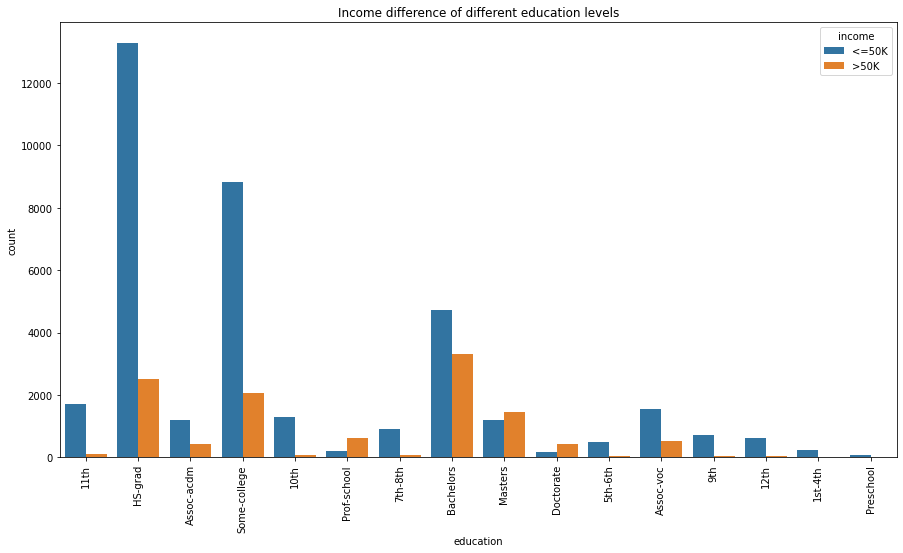

In [3]:
# Display the distribution of income by education level
# (How many earns less that 50k and how many earns more than 50k for different education levels)
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=data, x='education', hue='income', ax=ax)

ax.set_title("Income difference of different education levels")
plt.xticks(rotation=90)
plt.show()

### 2. With visualization, show the difference of income between adults working in different workclasses.

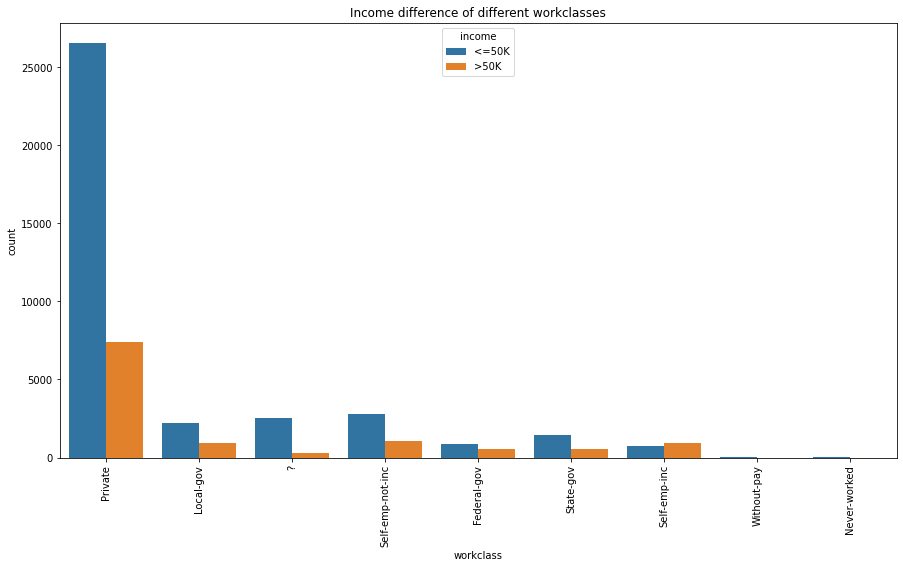

In [4]:
# Same as previous question
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=data, x='workclass', hue='income', ax=ax)

ax.set_title("Income difference of different workclasses")
plt.xticks(rotation=90)
plt.show()

### 3. With visualization, show the difference of income between adults with different marital status.

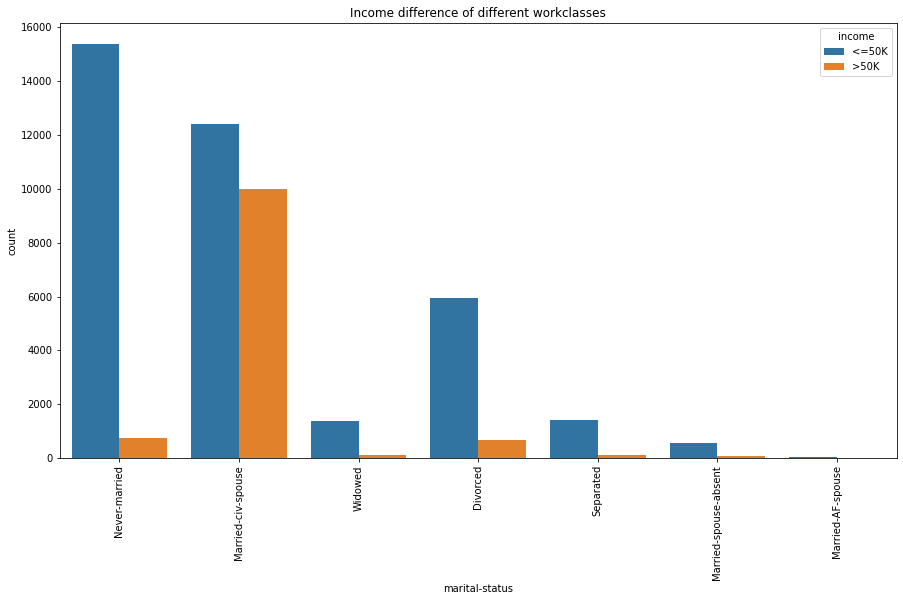

In [5]:
# Same as previous question
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=data, x='marital-status', hue='income', ax=ax)

ax.set_title("Income difference of different workclasses")
plt.xticks(rotation=90)
plt.show()

# II.Classification modelling

### 1. Split dataset into train-test sets

In [6]:
# Convert categorical data to integers
cat_columns = data.select_dtypes('object').columns
for col in cat_columns:
    data[col] = OrdinalEncoder().fit_transform(data[[col]])

# Extract the features and the targets
columns = list(data.columns)
columns.remove('income')

features = data[columns]
targets = data['income']

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.2)

### 2. Pick some classification models and perform cross validation

In [7]:
# I will choose KNN, Decision Tree and Random Forest so I don't have to preprocess
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

splitter = StratifiedShuffleSplit(n_splits=10)

iterations_no = 0
for train_index, val_index in splitter.split(features, targets):
    iterations_no += 1
    print(f'[Iteration #{iterations_no}]')
    X_train, Y_train = features.loc[train_index], targets.loc[train_index]
    X_val, Y_val = features.loc[val_index], targets.loc[val_index]
    
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_val)
    accuracy = accuracy_score(Y_val, predictions)
    print(f'  --> Accuracy KNN = {accuracy}')
    
    dt.fit(X_train, Y_train)
    predictions = dt.predict(X_val)
    accuracy = accuracy_score(Y_val, predictions)
    print(f'  --> Accuracy Decision Tree = {accuracy}')
    
    rf.fit(X_train, Y_train)
    predictions = rf.predict(X_val)
    accuracy = accuracy_score(Y_val, predictions)
    print(f'  --> Accuracy Random Forest = {accuracy}')
    
        

[Iteration #1]
  --> Accuracy KNN = 0.7807574206755373
  --> Accuracy Decision Tree = 0.8081883316274309
  --> Accuracy Random Forest = 0.8589559877175026
[Iteration #2]
  --> Accuracy KNN = 0.763152507676561
  --> Accuracy Decision Tree = 0.8143295803480041
  --> Accuracy Random Forest = 0.8562947799385875
[Iteration #3]
  --> Accuracy KNN = 0.7803480040941658
  --> Accuracy Decision Tree = 0.8128966223132037
  --> Accuracy Random Forest = 0.8650972364380758
[Iteration #4]
  --> Accuracy KNN = 0.7791197543500512
  --> Accuracy Decision Tree = 0.8110542476970317
  --> Accuracy Random Forest = 0.8493346980552713
[Iteration #5]
  --> Accuracy KNN = 0.7768679631525077
  --> Accuracy Decision Tree = 0.8012282497441147
  --> Accuracy Random Forest = 0.8517911975435005
[Iteration #6]
  --> Accuracy KNN = 0.7811668372569089
  --> Accuracy Decision Tree = 0.8186284544524053
  --> Accuracy Random Forest = 0.8618219037871033
[Iteration #7]
  --> Accuracy KNN = 0.7778915046059366
  --> Accuracy D

### 3. Perform hyper-parameters tuning and report F1 score of best model

In [11]:
model = RandomForestClassifier()
hyperparams = {
    'min_samples_leaf' : [1, 5, 8],
    'n_estimators' : [100, 150, 200]
}

gridcv = GridSearchCV(model, hyperparams, cv=3, verbose=3)
gridcv.fit(features, targets)
print(gridcv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END min_samples_leaf=1, n_estimators=100;, score=0.856 total time=   4.6s
[CV 2/3] END min_samples_leaf=1, n_estimators=100;, score=0.856 total time=   4.5s
[CV 3/3] END min_samples_leaf=1, n_estimators=100;, score=0.860 total time=   4.6s
[CV 1/3] END min_samples_leaf=1, n_estimators=150;, score=0.854 total time=   6.7s
[CV 2/3] END min_samples_leaf=1, n_estimators=150;, score=0.857 total time=   6.7s
[CV 3/3] END min_samples_leaf=1, n_estimators=150;, score=0.860 total time=   6.7s
[CV 1/3] END min_samples_leaf=1, n_estimators=200;, score=0.854 total time=   8.9s
[CV 2/3] END min_samples_leaf=1, n_estimators=200;, score=0.856 total time=   9.1s
[CV 3/3] END min_samples_leaf=1, n_estimators=200;, score=0.859 total time=   9.0s
[CV 1/3] END min_samples_leaf=5, n_estimators=100;, score=0.864 total time=   3.7s
[CV 2/3] END min_samples_leaf=5, n_estimators=100;, score=0.862 total time=   3.8s
[CV 3/3] END min_samples_le

In [12]:
# Train and test on best hyper-parameters 
model = RandomForestClassifier(min_samples_leaf=5, n_estimators=200)
model.fit(X_train, Y_train)

# Predict and report RMSE, R2
predictions = model.predict(X_test)
f1 = f1_score(Y_test, predictions)

print(f'[INFO] F1 score = {f1}')

[INFO] F1 score = 0.7522187574958021
